In [37]:
# Tugas Kecil 2
## Implementasi Library myConvexHull Menggunakan Algoritma Divide and Conquer

### Nama  : Dzaky Fattan Rizqullah
### NIM   : 13520003
### Kelas : K3

In [38]:
# Import seluruh modul yang diperlukan
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.spatial import ConvexHull

In [39]:
# Modul myConvexHull
# Dapat dipanggil oleh program utama dengan memanggil fungsi myConvexHull()

def sortPoints(x):
    # Mengurutkan titik2 pada array agar didapat urutan menaik pada x, kemudian pada y
    x = x[x[:,1].argsort()]
    x = x[x[:,0].argsort(kind='mergesort')]
    return x

def makeUniqueList(x):
    # membuat list yang elemen2nya unik
    uniqueList = []
    for e in x:
        flag = 0 
        for elem in uniqueList:
            if e[0] == elem[0] and e[1] == elem[1]:
                    flag = 1
        if flag == 0:
            if type(e) != list:
                e = e.tolist()
            uniqueList.append(e)
    return uniqueList

def determinePos(a, p1, p2):
    # menentukan posisi titik a apakah di atas atau dibawah garis p1p2, dengan mencari determinan matriks
    # [p1x p1y 1]
    # [p2x p2y 1]
    # [ax  ay  1]
    return (p1[0] * p2[1]) + (p2[0] * a[1]) + (a[0] * p1[1]) - (a[0] * p2[1]) - (p2[0] * p1[1]) - (p1[0] * a[1])

def distancePointToLine(x, p1, p2):
    # mengembalikan nilai jarak terpendek titik x ke garis p1p2
    return abs((p2[0] - p1[0]) * (p1[1] - x[1]) - (p1[0] - x[0]) * (p2[1] - p1[1])) / math.sqrt(((p2[0] - p1[0])**2) + ((p2[1] - p1[1])**2))

def getAngle(p1, p2, p3):
    # mengembalikan besar sudut p1p2p3 dalam derajat
    angle = math.degrees(math.atan2(p3[1]-p2[1], p3[0]-p2[0]) - math.atan2(p1[1]-p2[1], p1[0]-p2[0]))
    return angle + 360 if angle < 0 else angle

# IMPLEMENTASI DIVIDE AND CONQUER myConvexHull
def DnC(hull, sgmt, p1, p2, upper):
    # argument upper digunakan untuk membedakan apakah separuh convexhull yang 
    # dikerjakan adalah bagian atas (S1) atau bawah (S2)

    # Kalau sgmt kosong (tidak ada titik lain di atas p1p2),
    if not sgmt:
        # maka p1p2 menjadi pembentuk convex hull S1
        hull.append(p1)
        hull.append(p2)

    # Kalau jumlah elemen sgmt lebih dari satu
    elif len(sgmt) > 1:
        # Tentukan titik yang jarak terpendeknya paling jauh dari garis p1p2
        temp = sgmt[0]
        for i in sgmt:
            if distancePointToLine(temp, p1, p2) < distancePointToLine(i, p1, p2):
                temp = i
            # Jika ada lebih dari satu titik yang jarak terpendeknya terjauh,
            elif distancePointToLine(temp, p1, p2) == distancePointToLine(i, p1, p2):
                # maka pilih yang membentuk sudut yang lebih besar
                if  getAngle(temp, p1, p2) <= getAngle(i, p1, p2):
                    temp = i
            # Tidak perlu meninjau kasus untuk titik di dalam segitiga temp-p1-p2
        Sub1 = []
        Sub2 = []
        # Setelah itu menentukan titik2 di atas garis p1temp dan temp-p2
        for i in sgmt:
            # math.isclose() digunakan untuk menghindari kegagalan saat
            # membandingkan nilai bertipe data float
            point = i
            if upper:
                if (determinePos(point, p1, temp) > 0 and not (math.isclose(determinePos(point, p1, temp), 0, abs_tol=1e-10))):
                    Sub1.append(point)
                elif (determinePos(point, temp, p2) > 0 and not (math.isclose(determinePos(point, temp, p2), 0, abs_tol=1e-10))):
                    Sub2.append(point)
            else:
                if (determinePos(point, p1, temp) < 0 and not (math.isclose(determinePos(point, p1, temp), 0, abs_tol=1e-10))):
                    Sub1.append(point)
                elif (determinePos(point, temp, p2) < 0 and not (math.isclose(determinePos(point, temp, p2), 0, abs_tol=1e-10))):
                    Sub2.append(point)
        # dibagi menjadi dua kasus rekursif, Sub1 dan Sub2
        hull1 = DnC(hull, Sub1, p1, temp, upper)
        hull2 = DnC(hull, Sub2, temp, p2, upper)
        for e in hull1:
            hull.append(e)
        for f in hull2:
            hull.append(f)

    # Kalau jumlah elemen sgmt hanya satu
    else:
        # p1p2 dan satu2nya elemen pada sgmt menjadi pembentuk separuh bagian convex hull
        hull.append(p1)
        hull.append(p2)
        hull.append(sgmt[0])
    hull = makeUniqueList(hull)
    return hull

# IMPLEMENTASI FUNGSI UTAMA myConvexHull
def myConvexHull(hull):
    # menentukan titik2 pembentuk convex hull secara manual

    # Pertama, melakukan sort pada data S
    sortedPlot = sortPoints(hull)

    # Kemudian menentukan dua titik (p1, p2) sedemikian sehingga S terbagi 
    # menjadi S1 (di atas garis p1p2) dan S2 (di atas garis p1p2)
    p1 = sortedPlot[0]
    p2 = sortedPlot[len(sortedPlot)-1]

    # membuat list kosong untuk menampung S1 dan S2 secara terpisah
    upper = []
    lower = []

    # mengelompokkan titik2 yang posisinya di atas ataupun di bawah garus p1p2
    for i in sortedPlot:
        point = i.tolist()
        if (determinePos(point, p1, p2) > 0):
            upper.append(point)
        elif (determinePos(point, p1, p2) < 0):
            lower.append(point)

    # membuat list kosong yang menerima titik2 yang membentuk convexHull
    sortedUpper = []
    sortedLower = []
    # DnC dilakukan di sini, terpisah untuk upper dan lower
    sortedUpper = DnC(sortedUpper, upper, p1, p2, True)
    sortedUpper.sort(key = lambda i: i[0])
    sortedLower = DnC(sortedLower, lower, p1, p2, False)
    sortedLower.sort(key = lambda i: -i[0])

    # Mengambungkan upper dan lower dan menyesuaikan urutan agar dapat dibentuk garis
    for i in sortedLower:
        sortedUpper.append(i)
        
    # Membuat list sortedHull yang sudah di cek agar tidak ada duplikasi titik 
    # serta meng-append titik paling pertama di ujung list agar dapat dibentuk
    # garis convex hull
    sortedHull = makeUniqueList(sortedUpper)
    sortedHull.append(p1)
    
    # kembalikan tipe list menjadi ndarray
    nphull = np.array(sortedHull)
    return nphull

(150, 5)


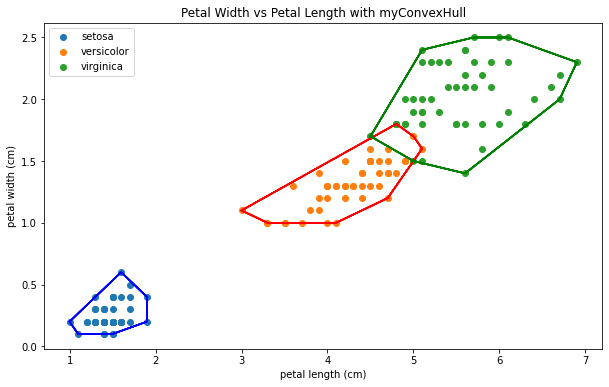

In [40]:
# IMPORT DATA IRIS (MENGIKUTI SPEK TUCIL 2)
data = datasets.load_iris()
# create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

# PERSIAPAN DATA, PEMANGGILAN FUNGSI MYCONVEXHULL
plt.figure(figsize=(10, 6))
colors = ['b', 'r', 'g']
plt.title('Petal Width vs Petal Length with myConvexHull')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:, [2, 3]].values
    # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    hull = myConvexHull(bucket)
    hullscipy = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for e in hull:
        plt.plot(hull[:, 0], hull[:, 1], colors[i])
plt.legend()

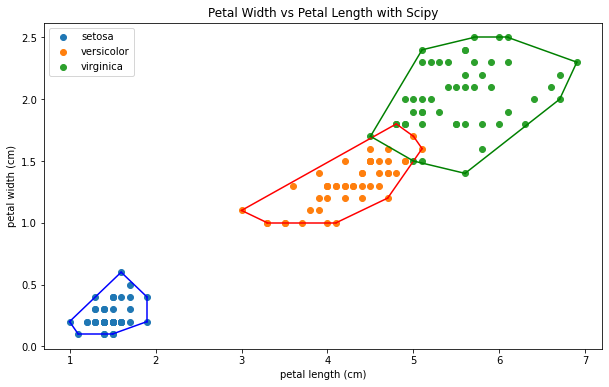

In [41]:
# PERSIAPAN DATA, PEMANGGILAN FUNGSI CONVEXHULL DARI SCIPY
plt.figure(figsize=(10, 6))
plt.title('Petal Width vs Petal Length with Scipy')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:, [2, 3]].values
    hullscipy = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hullscipy.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

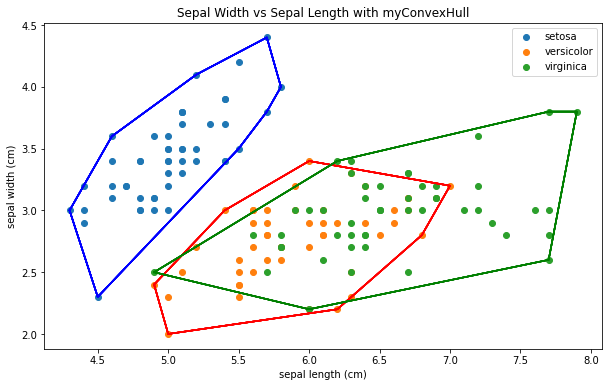

In [42]:
# PERSIAPAN DATA, PEMANGGILAN FUNGSI MYCONVEXHULL
plt.figure(figsize=(10, 6))
colors = ['b', 'r', 'g']
plt.title('Sepal Width vs Sepal Length with myConvexHull')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:, [0, 1]].values
    # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    hull = myConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for e in hull:
        plt.plot(hull[:, 0], hull[:, 1], colors[i])
plt.legend()

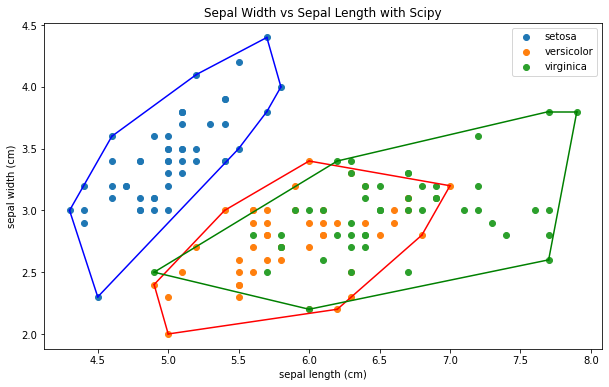

In [43]:
# PERSIAPAN DATA, PEMANGGILAN FUNGSI CONVEXHULL DARI SCIPY
plt.figure(figsize=(10, 6))
plt.title('Sepal Width vs Sepal Length with Scipy')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:, [0, 1]].values
    hullscipy = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hullscipy.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
plt.legend()

(178, 14)


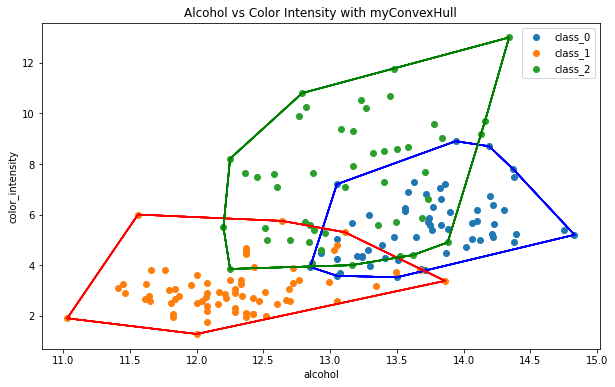

In [44]:
# IMPORT DATASET LAIN #2 (DATASET WINE)
data2 = datasets.load_wine()
# create a DataFrame
df2 = pd.DataFrame(data2.data, columns=data2.feature_names)
df2['Target'] = pd.DataFrame(data2.target)
print(df2.shape)
df2.head()

# PERSIAPAN DATA, PEMANGGILAN FUNGSI MYCONVEXHULL
# SUMBU X = ALCOHOL, SUMBU Y = COLOR INTENSITY
plt.figure(figsize=(10, 6))
plt.title('Alcohol vs Color Intensity with myConvexHull')
plt.xlabel(data2.feature_names[0])
plt.ylabel(data2.feature_names[9])
for i in range(len(data2.target_names)):
    bucket2 = df2[df2['Target'] == i]
    bucket2 = bucket2.iloc[:, [0, 9]].values
    # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    hull2 = myConvexHull(bucket2)
    plt.scatter(bucket2[:, 0], bucket2[:, 1], label=data2.target_names[i])
    for e in hull2:
        plt.plot(hull2[:, 0], hull2[:, 1], colors[i])
plt.legend()

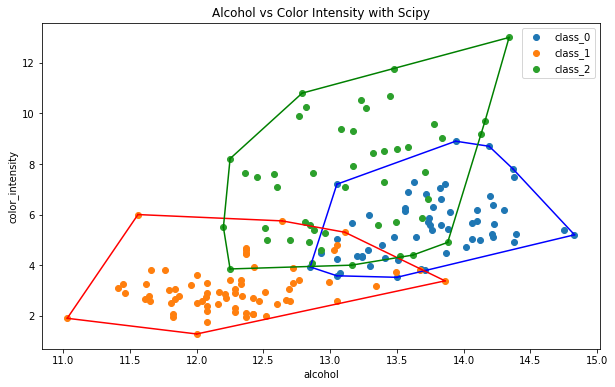

In [45]:
# PERSIAPAN DATA, PEMANGGILAN FUNGSI CONVEXHULL DARI SCIPY
# SUMBU X = ALCOHOL, SUMBU Y = COLOR INTENSITY
plt.figure(figsize=(10, 6))
plt.title('Alcohol vs Color Intensity with Scipy')
plt.xlabel(data2.feature_names[0])
plt.ylabel(data2.feature_names[9])
for i in range(len(data2.target_names)):
    bucket2 = df2[df2['Target'] == i]
    bucket2 = bucket2.iloc[:, [0, 9]].values
    hullscipy2 = ConvexHull(bucket2)
    plt.scatter(bucket2[:, 0], bucket2[:, 1], label=data2.target_names[i])
    for simplex in hullscipy2.simplices:
        plt.plot(bucket2[simplex, 0], bucket2[simplex, 1], colors[i])
plt.legend()

(569, 31)


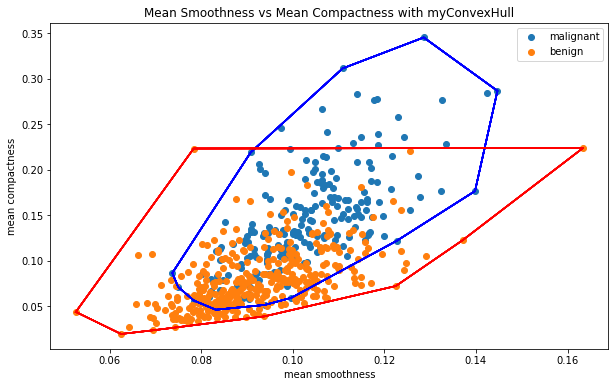

In [50]:
# IMPORT DATASET LAIN #3 (DATASET DIABETES)
data3 = datasets.load_breast_cancer()
# create a DataFrame
df3 = pd.DataFrame(data3.data, columns=data3.feature_names)
df3['Target'] = pd.DataFrame(data3.target)
print(df3.shape)
df3.head()

# PERSIAPAN DATA, PEMANGGILAN FUNGSI MYCONVEXHULL
# SUMBU X = MEAN AREA, SUMBU Y = MEAN SMOOTHNESS
plt.figure(figsize=(10, 6))
plt.title('Mean Smoothness vs Mean Compactness with myConvexHull')
plt.xlabel(data3.feature_names[4])
plt.ylabel(data3.feature_names[5])
for i in range(len(data3.target_names)):
    bucket3 = df3[df3['Target'] == i]
    bucket3 = bucket3.iloc[:, [4, 5]].values
    # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    hull3 = myConvexHull(bucket3)
    plt.scatter(bucket3[:, 0], bucket3[:, 1], label=data3.target_names[i])
    for e in hull3:
        plt.plot(hull3[:, 0], hull3[:, 1], colors[i])
plt.legend()

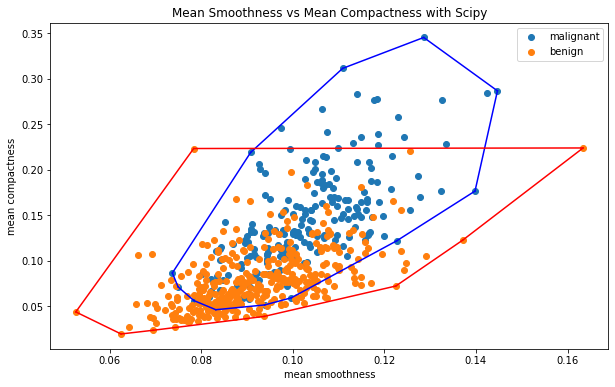

In [51]:
# PERSIAPAN DATA, PEMANGGILAN FUNGSI CONVEXHULL DARI SCIPY
# SUMBU X = MEAN AREA, SUMBU Y = MEAN SMOOTHNESS
plt.figure(figsize=(10, 6))
plt.title('Mean Smoothness vs Mean Compactness with Scipy')
plt.xlabel(data3.feature_names[4])
plt.ylabel(data3.feature_names[5])
for i in range(len(data3.target_names)):
    bucket3 = df3[df3['Target'] == i]
    bucket3 = bucket3.iloc[:, [4, 5]].values
    hullscipy3 = ConvexHull(bucket3)
    plt.scatter(bucket3[:, 0], bucket3[:, 1], label=data3.target_names[i])
    for simplex in hullscipy3.simplices:
        plt.plot(bucket3[simplex, 0], bucket3[simplex, 1], colors[i])
plt.legend()